In [1]:
#import the libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#create a function that reads the data from a PLQY file
def read_data(file):
    if file.endswith('.asc'):
        df = pd.read_csv(file, on_bad_lines='skip', sep="\t", skiprows=90, header=None)
    elif file.endswith('.csv'):
        df = pd.read_csv(file, on_bad_lines='skip', sep=", ", skiprows=1, header=None)
    return df

def pre_treat_asc(df):
    df.columns = ['wavelength', 'intensity']
    #divide the intensity by 100
    df['intensity'] = df['intensity']/100
    return df

C:\Users\Lucas\Documents\1.EPFL\MA4\PdS\PV_lab_PdS\UV_VIS\w1\1_TR.Sample.csv
C:\Users\Lucas\Documents\1.EPFL\MA4\PdS\PV_lab_PdS\UV_VIS\w2\1_TR.Sample.asc


C:\Users\Lucas\AppData\Local\Temp\ipykernel_9672\1281829734.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file, on_bad_lines='skip', sep=", ", skiprows=1, header=None)


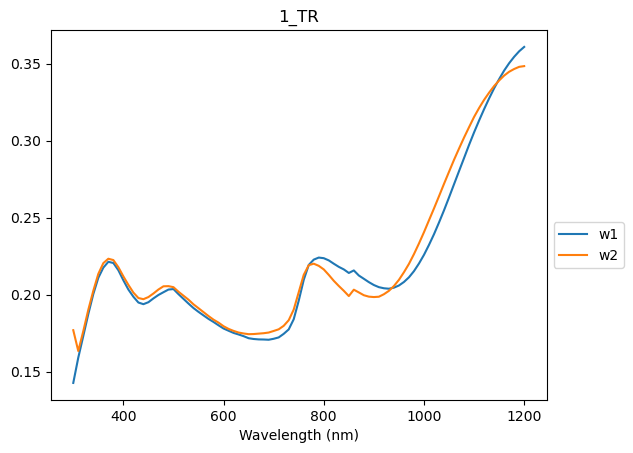

In [9]:
file_2 = "1_TR"
#for each folder in the UV_VIS folder, do the following:
#1. read the file the has file_2 in the name
#2. plot the data

# Path: plot_uv.ipynb

import os
import glob

path = "C:\\Users\\Lucas\\Documents\\1.EPFL\\MA4\\PdS\\PV_lab_PdS\\UV_VIS"
folders = os.listdir(path)

for folder in folders:
    files = glob.glob(path + "\\" + folder + "\\" + file_2 + "*")
    for file in files:
        print(file)
        df = pre_treat_asc(read_data(file))
        plt.plot(df['wavelength'], df['intensity'])

#add the legend to the left
plt.legend(folders, loc='upper left', bbox_to_anchor=(1, 0.5));

#add the labels to the axes
plt.xlabel('Wavelength (nm)');

#add a title to the plot with the name of the file
plt.title(file_2);

C:\Users\Lucas\AppData\Local\Temp\ipykernel_9672\1281829734.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file, on_bad_lines='skip', sep=", ", skiprows=1, header=None)
C:\Users\Lucas\AppData\Local\Temp\ipykernel_9672\1281829734.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file, on_bad_lines='skip', sep=", ", skiprows=1, header=None)


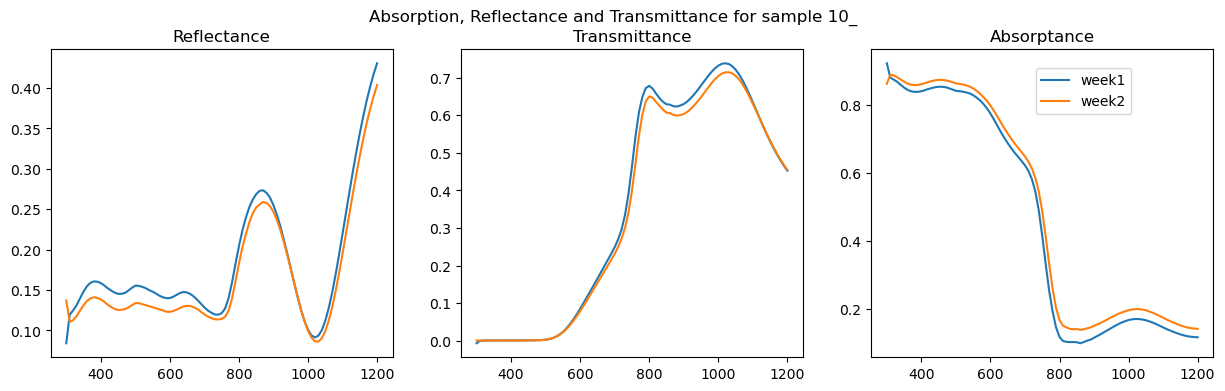

In [42]:
#open all the files that contains the string file_2 and put them in a dataframe
sample_name = "10_"
week_name = "w1"
df_abs1 = pd.DataFrame() 
files = glob.glob(path + "\\" + week_name + "\\" + sample_name + "*")
for file in files:
    df = pre_treat_asc(read_data(file))
    #if the dataframe is empty, then add the data to it
    if df_abs1.empty:
        df_abs1 = df
    else:
    #merge df with df_abs on the wavelength column
        df_abs1 = pd.merge(df_abs1, df, on='wavelength', how='outer')
        df_abs1.rename(columns={'intensity_x': 'reflectance_1', 'intensity_y': 'transmittance_1'}, inplace=True)
#add a column to the dataframe with the value 1 - transmittance - reflectance
df_abs1['absorptance_1'] = 1 - df_abs1['reflectance_1'] - df_abs1['transmittance_1']

week_name = "w2"
df_abs2 = pd.DataFrame() 
files = glob.glob(path + "\\" + week_name + "\\" + sample_name + "*")
for file in files:
    df = pre_treat_asc(read_data(file))
    #if the dataframe is empty, then add the data to it
    if df_abs2.empty:
        df_abs2 = df
    else:
    #merge df with df_abs on the wavelength column
        df_abs2 = pd.merge(df_abs2, df, on='wavelength', how='outer')
        df_abs2.rename(columns={'intensity_x': 'reflectance_2', 'intensity_y': 'transmittance_2'}, inplace=True)
#add a column to the dataframe with the value 1 - transmittance - reflectance
df_abs2['absorptance_2'] = 1 - df_abs2['reflectance_2'] - df_abs2['transmittance_2']

#merge the two dataframes on the wavelength column
df_abs = pd.merge(df_abs1, df_abs2, on='wavelength', how='outer')


#plot the data on three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, figsize=(15,4))
ax1.plot(df_abs['wavelength'], df_abs['reflectance_1'], label='reflectance_1')
ax1.plot(df_abs['wavelength'], df_abs['reflectance_2'], label='reflectance_2')
ax2.plot(df_abs['wavelength'], df_abs['transmittance_1'], label='transmittance_1')
ax2.plot(df_abs['wavelength'], df_abs['transmittance_2'], label='transmittance_2')
ax3.plot(df_abs['wavelength'], df_abs['absorptance_1'], label='absorptance_1')
ax3.plot(df_abs['wavelength'], df_abs['absorptance_2'], label='absorptance_2')

#add a title to the plot
fig.suptitle('Absorption, Reflectance and Transmittance for sample ' + sample_name)

#add a title to the first subplot
ax1.set_title('Reflectance')

#add a title to the second subplot
ax2.set_title('Transmittance')

#add a title to the third subplot
ax3.set_title('Absorptance')

lgd = ["week1", "week2"]
#add a shared legend to the three subplots on the upper right corner
fig.legend(lgd, loc='upper right', bbox_to_anchor=(0.85, 0.85))
